### Atividade 8

##### Bruno Wallison Fernandes Nunes 0380043

In [80]:
%matplotlib inline
import sklearn
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from neural import Perceptron
from neural import AdalineGD
from sklearn import model_selection
from sklearn import linear_model
from neural import AdalineSGD
from sklearn import metrics
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


In [10]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')






In [34]:
data = pd.read_csv("pima-indians-diabetes.csv",delimiter=',',header=None)
X = data[[1, 5]] 
y = data[8]


### perceptron

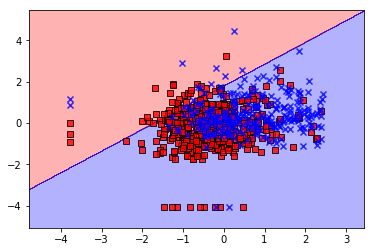

In [36]:
## perceptron

processor = preprocessing.StandardScaler().fit(X)
x_transf = processor.transform(X)
model = Perceptron()
model.fit(x_transf,y)
plot_decision_regions(x_transf,y, classifier=model)

plt.show()



### AdalineGD

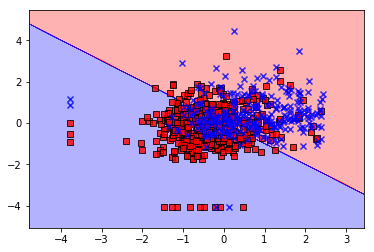

In [39]:
processor = preprocessing.StandardScaler().fit(X)
x_transf = processor.transform(X)
model = AdalineGD()
model.fit(x_transf,y)
plot_decision_regions(x_transf,y, classifier=model)

plt.show()



### AdalineSGD

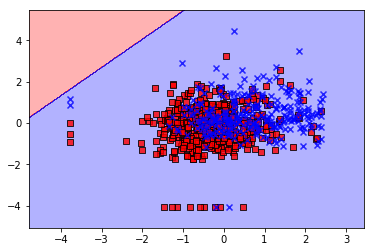

In [42]:
processor = preprocessing.StandardScaler().fit(X)
x_transf = processor.transform(X)
model = AdalineSGD()
model.fit(x_transf,y)
plot_decision_regions(x_transf,y, classifier=model)

plt.show()



In [82]:
X = np.array(data)[:,0:7]
acc_perceptron = np.empty((1))
acc_agd = np.empty((1))
acc_asgd = np.empty((1))
acc_svm = np.empty((1))
acc_nb = np.empty((1))
acc_lr = np.empty((1))
acc_knn = np.empty((1))
# kfold

train = sklearn.model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
dataset = train.split(X, y)

for train_index, test_index in dataset:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    std_scale = preprocessing.StandardScaler().fit(X_train)
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
    
    perceptron  = Perceptron()
    perceptron.fit(X_train_std,y_train)
    y_pred = perceptron.predict(X_test_std)
    acc = metrics.accuracy_score(y_test,y_pred)
    acc_perceptron = np.append(acc_perceptron,acc)

    agd = AdalineGD()
    agd.fit(X_train_std,y_train)
    y_pred = agd.predict(X_test_std)
    acc = metrics.accuracy_score(y_test,y_pred)
    acc_agd = np.append(acc_agd,acc)
    
    asgd = AdalineSGD()
    asgd.fit(X_train_std,y_train)
    y_pred = asgd.predict(X_test_std)
    acc = metrics.accuracy_score(y_test,y_pred)
    acc_asgd = np.append(acc_asgd,acc)
    
    lr = linear_model.LogisticRegression()
    lr.fit(X_train_std,y_train)
    y_pred = lr.predict(X_test_std)
    acc = metrics.accuracy_score(y_test,y_pred)
    acc_lr = np.append(acc_lr,acc)
    
    knn = neighbors.KNeighborsClassifier()
    knn.fit(X_train_std,y_train)
    y_pred = knn.predict(X_test_std)
    acc = metrics.accuracy_score(y_test,y_pred)
    acc_knn = np.append(acc_knn,acc)
    
    nb = GaussianNB()
    nb.fit(X_train_std,y_train)
    y_pred = nb.predict(X_test_std)
    acc = metrics.accuracy_score(y_test,y_pred)
    acc_nb = np.append(acc_nb,acc)
    
    svc = svm.SVC()
    svc.fit(X_train_std,y_train)
    y_pred = svc.predict(X_test_std)
    acc = metrics.accuracy_score(y_test,y_pred)
    acc_svm = np.append(acc_svm,acc)
    
    
print(np.mean(acc_agd))
print(np.mean(acc_asgd))
print(np.mean(acc_knn))
print(np.mean(acc_lr))
print(np.mean(acc_nb))
print(np.mean(acc_perceptron))
print(np.mean(acc_svm))


/home/darkbyte/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/home/darkbyte/Documentos/Machine-Learning/neural.py:248: RuntimeWarning: invalid value encountered in greater_equal
  return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


0.08700271086060885
0.25
nan
0.7497262167877852
0.8134249589913787
0.46582269672217136
0.8085727539435035
